In [ ]:
#Liên kết Google Drive để test chương trình

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cài đặt ultralytics

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.8/699.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
#Import mô hình YOLO

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 508, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
#Tải dataset được lưu trên roboflow

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2EzYiygnqFUNFmffc1jY")
project = rf.workspace("tam-binh").project("garbage-detection-xjmyz")
dataset = project.version(6).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.1, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Garbage-detection-6 in yolov8:: 100%|██████████| 5287/5287 [00:01<00:00, 5080.77it/s]


**Chỉnh sửa lại thông tin trong file data.ymal**

* Trong phần "tệp" của google colab sẽ hiện thị thêm folder "Garbage-detection-3"
trong đó có file data.yaml, double-click vào và chỉnh sửa thông tin ở dòng 15, 16, 17.

* Copy path của folder images trong mỗi folder con test, train, valid trong folder Gargabe-detection-2 rồi thay vào file data-yaml ở các dòng tương ứng.

In [5]:
!yolo task=detect mode=train model=yolov8m.pt data ={dataset.location}/data.yaml epochs=40 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 209MB/s]
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Garbage-detection-6/data.yaml, epochs=40, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

Sau khi train xong sẽ xuất hiện folder "runs" tiếp tục mở tiếp folder "detect" -> "train" -> "weights" sẽ xuất hiện file "best.pt". Copy đường dẫn của thư mục này và thay vào sau chữ 'model = ' của đoạn code tiếp theo để tiến hành test.

In [6]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source='/content/drive/MyDrive/test'

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/8 /content/drive/MyDrive/test/cardboard301.jpg: 480x640 1 Paper, 80.9ms
image 2/8 /content/drive/MyDrive/test/cardboard304.jpg: 480x640 1 Paper, 28.1ms
image 3/8 /content/drive/MyDrive/test/green-glass36.jpg: 352x640 1 Glass, 77.2ms
image 4/8 /content/drive/MyDrive/test/green-glass73.jpg: 640x640 2 Glasss, 37.8ms
image 5/8 /content/drive/MyDrive/test/metal57.jpg: 416x640 1 Paper, 85.4ms
image 6/8 /content/drive/MyDrive/test/metal92.jpg: 480x640 1 Glass, 29.6ms
image 7/8 /content/drive/MyDrive/test/plastic106.jpg: 480x640 1 Plastic, 28.1ms
image 8/8 /content/drive/MyDrive/test/plastic97.jpg: 480x640 1 Plastic, 28.1ms
Speed: 2.9ms preprocess, 49.4ms inference, 82.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https:/

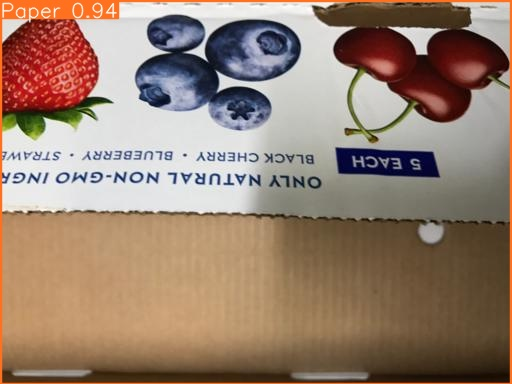

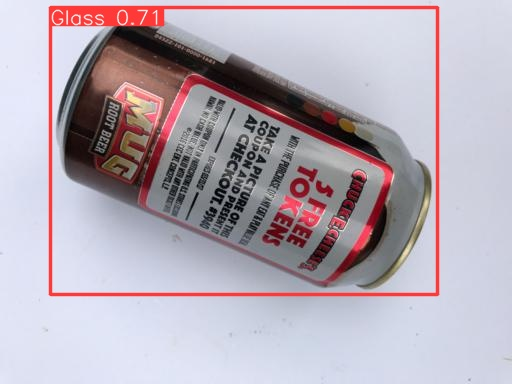

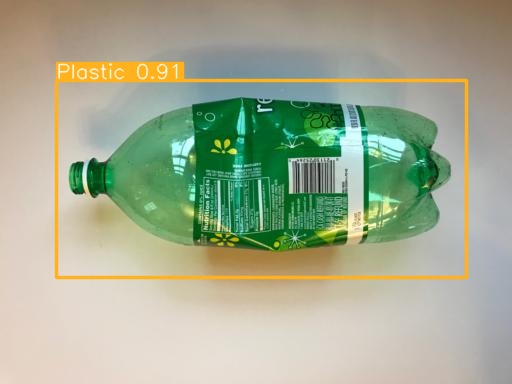

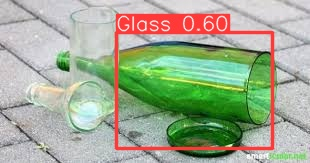

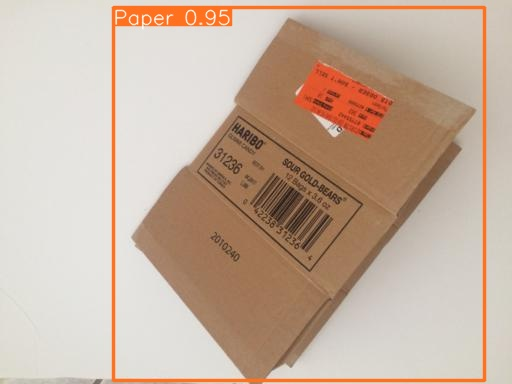

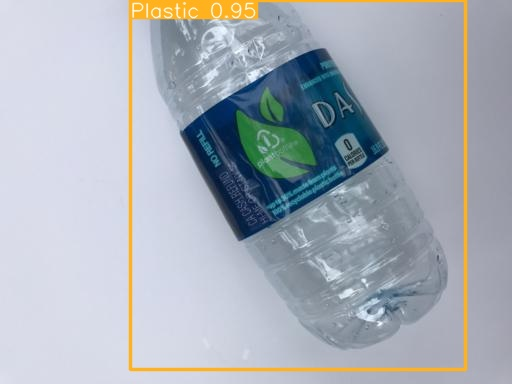

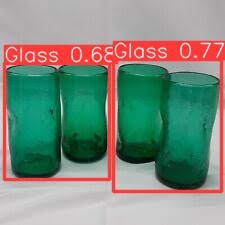

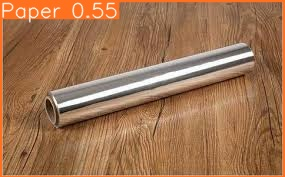

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height = 640))
  print("\n")

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.2 source='/content/91910669f5bc5ee207ad.jpg'

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/91910669f5bc5ee207ad.jpg: 640x384 1 Plastic, 113.9ms
Speed: 4.4ms preprocess, 113.9ms inference, 693.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict
